<a href="https://colab.research.google.com/github/BrendanGramp/UMDAOSC650/blob/main/AOSC650RNNFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM

Data being read includes precipitation, gage height, river discharge, and longitude/latitude


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation, TimeDistributed, RepeatVector
import keras
from keras.src.preprocessing.sequence import TimeseriesGenerator
#from google.colab import drive
#drive.mount('/Colab_Notebooks')

In [22]:
pwd

'/content'

In [9]:
# reading dataset from NOAA online
dataset = pd.read_csv(
    '01302020PowerPrecipitation2010-2023.csv',
    delimiter=',')
datasettwo = pd.read_csv(
    '01302020Discharge2010-2023.csv',
    delimiter=',')
datasetthree = pd.read_csv(
    '01302020GageHeight2010-2023.csv',
    delimiter=',')

In [84]:
# data features include seasons, year, total SST (C), and ONI (ENSO index)
dataset.head()

,YEAR,MO,DY,HR,PRECTOTCORR,Time2
0,2009,12,31,19,0.14,0
1,2009,12,31,20,0.28,4
2,2009,12,31,21,0.33,8
3,2009,12,31,22,0.28,12
4,2009,12,31,23,0.22,16


In [86]:
datasettwo.head()

,agency_cd,site_no,datetime,tz_cd,106410_00060,106410_00060_cd,Time,Time2
0,USGS,1302020,1/1/2010 0:00,EST,94.9,A,40179.000000,0.0
1,USGS,1302020,1/1/2010 0:15,EST,94.9,A,40179.010416,1.0
2,USGS,1302020,1/1/2010 0:30,EST,94.9,A,40179.020833,2.0
3,USGS,1302020,1/1/2010 0:45,EST,94.9,A,40179.031250,3.0
4,USGS,1302020,1/1/2010 1:00,EST,94.9,A,40179.041666,4.0


In [87]:
datasetthree.head()

,agency_cd,site_no,datetime,tz_cd,106409_00065,106409_00065_cd,Time,Time2
0,USGS,1302020,1/1/2010 0:00,EST,0.97,A,40179.000000,0.0
1,USGS,1302020,1/1/2010 0:15,EST,0.97,A,40179.010416,1.0
2,USGS,1302020,1/1/2010 0:30,EST,0.97,A,40179.020833,2.0
3,USGS,1302020,1/1/2010 0:45,EST,0.97,A,40179.031250,3.0
4,USGS,1302020,1/1/2010 1:00,EST,0.97,A,40179.041666,4.0


In [85]:
dataset.tail()

,YEAR,MO,DY,HR,PRECTOTCORR,Time2
122707,2023,12,31,14,0.0,490828
122708,2023,12,31,15,0.0,490832
122709,2023,12,31,16,0.0,490836
122710,2023,12,31,17,0.0,490840
122711,2023,12,31,18,0.0,490844


In [77]:
datasettwo["106410_00060"].tail()

489972    109.0
489973    109.0
489974    109.0
489975    109.0
489976    109.0
Name: 106410_00060, dtype: float64

In [79]:
datasetthree["106409_00065"].tail()

490179    0.93
490180    0.93
490181    0.93
490182    0.93
490183    0.93
Name: 106409_00065, dtype: float64

In [10]:
# drop any nans
dataset = dataset.dropna(subset=["PRECTOTCORR"])

In [11]:
# quick stats
dataset.describe()

,YEAR,MO,DY,HR,PRECTOTCORR,Time2
count,122712.000000,122712.000000,122712.00000,122712.000000,122712.000000,122712.000000
mean,2016.499136,6.523372,15.72834,11.500000,0.143851,245422.000000
std,4.030828,3.448596,8.79958,6.922215,0.533112,141696.189815
min,2009.000000,1.000000,1.00000,0.000000,0.000000,0.000000
25%,2013.000000,4.000000,8.00000,5.750000,0.000000,122711.000000
50%,2016.000000,7.000000,16.00000,11.500000,0.000000,245422.000000
75%,2020.000000,10.000000,23.00000,17.250000,0.030000,368133.000000
max,2023.000000,12.000000,31.00000,23.000000,19.180000,490844.000000


In [12]:
datasettwo.describe()

,site_no,106410_00060,Time,Time2
count,489977.0,489977.00000,489977.000000,489977.000000
mean,1302020.0,76.70612,42732.821357,245166.850337
std,0.0,128.36378,1475.420189,141640.338186
min,1302020.0,7.10000,40179.000000,0.000000
25%,1302020.0,28.90000,41455.479166,122542.000000
50%,1302020.0,45.80000,42731.750000,245064.000000
75%,1302020.0,76.60000,44008.822916,367663.000000
max,1302020.0,3000.00000,45291.989583,490847.000000


<Axes: xlabel='YEAR'>

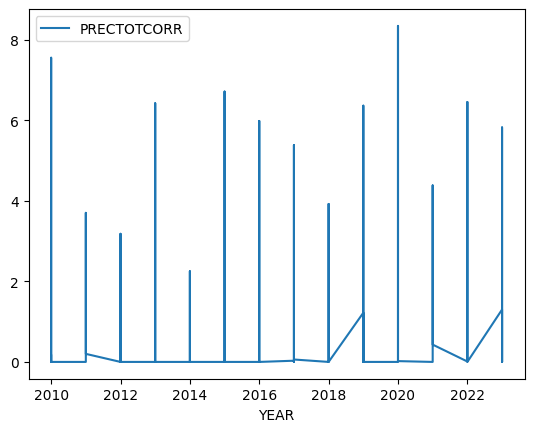

In [13]:
dataset[dataset["MO"]==1].plot("YEAR","PRECTOTCORR")

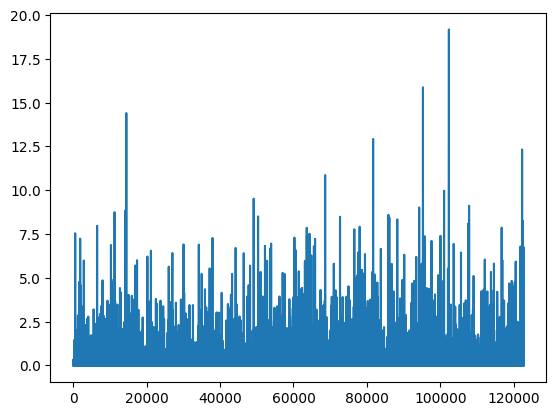

In [14]:
plt.plot(range(122712), dataset["PRECTOTCORR"])

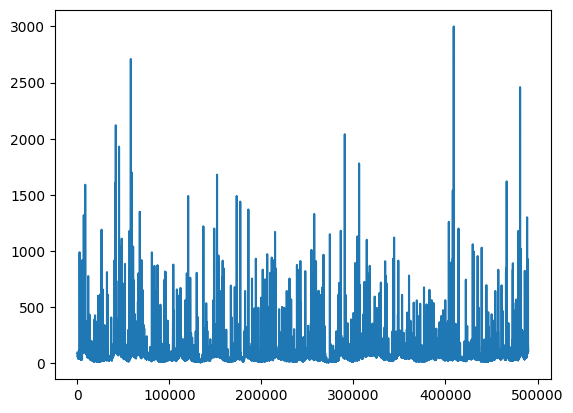

In [15]:
plt.plot(range(489977), datasettwo["106410_00060"])

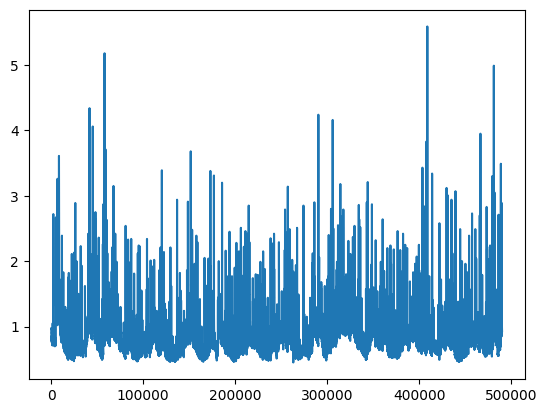

In [16]:
plt.plot(range(490184), datasetthree["106409_00065"])

<Axes: xlabel='YR'>

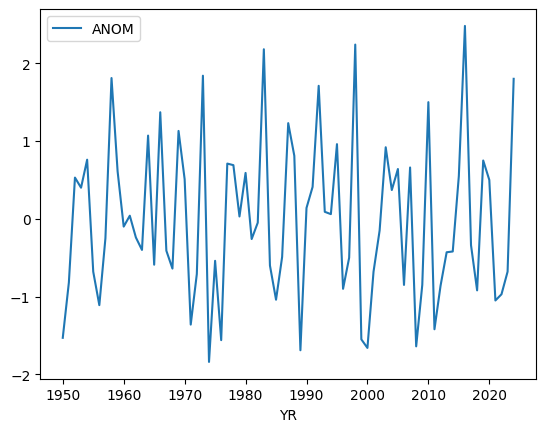

In [ ]:
# quick viz
# djf only
#dataset[dataset["SEAS"]=="DJF"].plot("YR","ANOM")

In [17]:
#k = 0
#for x in dataset["Time2"]:
#  if x in datasettwo["Time2"]:
#    if x+1 in datasettwo["Time2"]:
#      if x+2 in datasettwo["Time2"]:
#        if x+3 in datasettwo["Time2"]:
#          k=k+1
#print(k)

122494


In [225]:
#k = 0
#train = []
#target = []
#y0 = 0
#z0 = 0
#for x in dataset["Time2"]:
#  check = []
#  for y in datasettwo["Time2"][y0:x+1]:
#    find = False
#    if y == x:
#       a = np.where(datasettwo["Time2"]==y)[0][0]
#       if datasettwo["Time2"][a+1]==x+1:
#         if datasettwo["Time2"][a+2]==x+2:
#           if datasettwo["Time2"][a+3]==x+3:
#             for z in datasetthree["Time2"][z0:x+1]:
#               if z == x:
#                 b = np.where(datasetthree["Time2"]==z)[0][0]
#                 if datasetthree["Time2"][b+1]==x+1:
#                   if datasetthree["Time2"][b+2]==x+2:
#                     if datasetthree["Time2"][b+3]==x+3:
#                       if datasetthree["Time2"][b+7]==x+7:
#                         check.append([dataset["PRECTOTCORR"][np.where(dataset["Time2"]==x)[0][0]], datasettwo["106410_00060"][a], datasetthree["106409_00065"][b]])
#                         check.append([dataset["PRECTOTCORR"][np.where(dataset["Time2"]==x)[0][0]], datasettwo["106410_00060"][a+1], datasetthree["106409_00065"][b+1]])
#                         check.append([dataset["PRECTOTCORR"][np.where(dataset["Time2"]==x)[0][0]], datasettwo["106410_00060"][a+2], datasetthree["106409_00065"][b+2]])
#                         check.append([dataset["PRECTOTCORR"][np.where(dataset["Time2"]==x)[0][0]], datasettwo["106410_00060"][a+3], datasetthree["106409_00065"][b+3]])
#                         train.append(check)
#                         target.append(datasetthree["106409_00065"][b+8])
#                         find = True
#                         y0 = int(a)+1
#                         k=k+1
#                         break
#    if find == True:
#      break
#print(k)

In [18]:
k = 0
n = 0
train = []
target = []
for x in dataset["Time2"]:
  check = []
  try:
    check.append([dataset["PRECTOTCORR"][np.where(dataset["Time2"]==x)[0][0]], datasettwo["106410_00060"][np.where(datasettwo["Time2"]==x)[0][0]], datasetthree["106409_00065"][np.where(datasetthree["Time2"]==x)[0][0]]])
    check.append([dataset["PRECTOTCORR"][np.where(dataset["Time2"]==x)[0][0]], datasettwo["106410_00060"][np.where(datasettwo["Time2"]==x+1)[0][0]], datasetthree["106409_00065"][np.where(datasetthree["Time2"]==x+1)[0][0]]])
    check.append([dataset["PRECTOTCORR"][np.where(dataset["Time2"]==x)[0][0]], datasettwo["106410_00060"][np.where(datasettwo["Time2"]==x+2)[0][0]], datasetthree["106409_00065"][np.where(datasetthree["Time2"]==x+2)[0][0]]])
    check.append([dataset["PRECTOTCORR"][np.where(dataset["Time2"]==x)[0][0]], datasettwo["106410_00060"][np.where(datasettwo["Time2"]==x+3)[0][0]], datasetthree["106409_00065"][np.where(datasetthree["Time2"]==x+3)[0][0]]])
    check.append(datasetthree["106409_00065"][np.where(datasetthree["Time2"]==x+5)[0][0]])
    train.append(check[0:4])
    target.append(check[4])
    k = k+1
  except:
    n = n+1
print(k)

122395


In [19]:
len(train)

122395

In [20]:
len(target)

122395

In [21]:
datasetthree["Time2"][400000]

400170.0

In [22]:
datasettwo["Time2"][400000:400005]

400000    400186.0
400001    400187.0
400002    400188.0
400003    400189.0
400004    400190.0
Name: Time2, dtype: float64

In [23]:
v = np.array(datasetthree["Time2"])
np.where(datasetthree["Time2"]==400170)[0][0]


400000

In [24]:
# train test split by years
trainds = train[0:90000]
traintargetds = [target[0:90000]]
testds = train[90000:]
testtargetds = [target[90000:]]

In [25]:
trainds = np.array(trainds)
traintargetds = np.array(traintargetds).T
testds = np.array(testds)
testtargetds = np.array(testtargetds).T

In [26]:
trainds.shape

(90000, 4, 3)

In [27]:
traintargetds.shape

(90000, 1)

In [28]:
testds.shape

(32395, 4, 3)

In [113]:
# grab anoms columns (ONI) and reset index
# reshape to be (samples, features)
# number of features here is just 1 (ONI)
#trainds = trainds.reset_index(drop=True)["106409_00065"].values.reshape(-1, 1)
#testsds = testsds.reset_index(drop=True)["106409_00065"].values.reshape(-1, 1)

In [29]:
# checking shapes -- make sure (samples, features)
print(trainds.shape, testds.shape)

(90000, 4, 3) (32395, 4, 3)


In [240]:
# Feature Scaling
#sc = MinMaxScaler(feature_range=(0,1))

In [241]:
# do rescaling
#trainds_scaled = sc.fit_transform(trainds)
#testsds_scaled = sc.transform(testsds)

# Many-to-One LSTM

In [51]:
# for help with data manipulation for time series rnn training; we can use the time series generator from keras

# dummy input for understanding
# data = np.array([[i] for i in range(50)])

# here goes our training data
data = trainds

# the shape of your target is your prediction shape (e.g., here we make it 1)
#target = data

# the length of the input feature
n_input=4 # you can change this! doesn't HAVE to be 4 months input
n_features=data.shape[1]*data.shape[2]

# this is the generator that will go into our rnn for training
#data_gen = TimeseriesGenerator(data,
#                               traintargetds,
#                               length=n_input,
#                               sampling_rate=1,
#                               batch_size=1000, # you can try different batch sizes
#                               shuffle=True)

In [52]:
# check shapes
print(data.shape, traintargetds.shape, n_features)

(90000, 4, 3) (90000, 1) 12


In [118]:
# quick check of output
#batch_0 = data_gen[0]
#x, y = batch_0
#print(x[0], y[0])
#print(x.shape, y.shape)

[[1.14]
 [1.13]
 [1.13]
 [1.13]] [1.12]
(1000, 4, 1) (1000, 1)


In [53]:
# many-to-one example
# lets make our rnn!
regressor = Sequential()

# LSTM; input shape is 1 (for one time step at a time) and n_features which is also 1 for our toy example
regressor.add(keras.layers.Input(shape=(4, 3)))

# don't return sequence; just the last output of the input sequence
regressor.add(LSTM(units=128, return_sequences=False))

#regressor.add(Dense(32))

# one neuron for output prediction
regressor.add(Dense(1))
regressor.add(Activation('linear'))

METRICS = [
    keras.metrics.MeanSquaredError(name='mean_squared_error'),
    keras.metrics.RootMeanSquaredError(name='root_mean_squared_error'),
]

# compile model
regressor.compile(keras.optimizers.Adam(learning_rate=0.002), loss='mean_squared_error', metrics=METRICS)

# what does graph look like?
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               67584     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 67713 (264.50 KB)
Trainable params: 67713 (264.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# train the lstm!
history = regressor.fit(x = trainds, y = traintargetds, validation_split=0.1, epochs=20, batch_size = 500, shuffle=True)

Epoch 1/20
162/162 [==============================] - 9s 43ms/step - loss: 0.0421 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.2051 - val_loss: 0.0045 - val_mean_squared_error: 0.0045 - val_root_mean_squared_error: 0.0668
Epoch 2/20
162/162 [==============================] - 5s 31ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0809 - val_loss: 0.0049 - val_mean_squared_error: 0.0049 - val_root_mean_squared_error: 0.0697
Epoch 3/20
162/162 [==============================] - 6s 35ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0675 - val_loss: 0.0028 - val_mean_squared_error: 0.0028 - val_root_mean_squared_error: 0.0531
Epoch 4/20
162/162 [==============================] - 6s 36ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0610 - val_loss: 0.0031 - val_mean_squared_error: 0.0031 - val_root_mean_squared_error: 0.0560
Epoch 5/20
162/162 [==============================] - 5s 32m

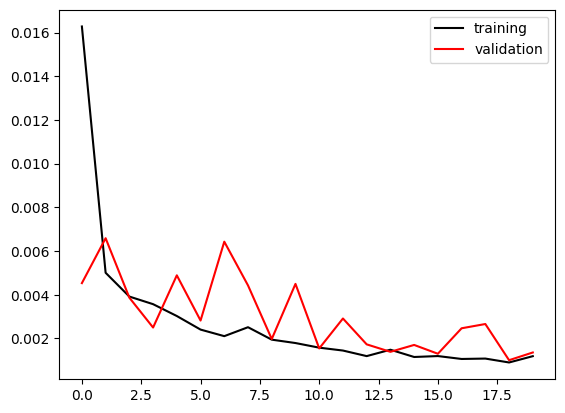

In [46]:
plt.plot(history.history["mean_squared_error"], c='k', label='training')
plt.plot(history.history["val_mean_squared_error"], c='r', label='validation')
plt.legend(['training', 'validation'])
plt.show()

In [123]:
# here goes our testing data that was already scaled
#testdata = testsds_scaled

#testtarget = testdata

#testdata_gen = TimeseriesGenerator(
#    testdata,
#    testtarget,
#    length=n_input,
#    sampling_rate=1,
#    batch_size=testdata.shape[0], # all samples
#    shuffle=False)

In [124]:
# quick check of output
#batch_0 = testdata_gen[0]
#x, y = batch_0
#print(x[0], y[0])
#print(x.shape, y.shape)

[[0.09513742]
 [0.09513742]
 [0.09513742]
 [0.09513742]] [0.09513742]
(98350, 4, 1) (98350, 1)


In [47]:
# predict using test data
oni_predictions = regressor.predict(testds)

1013/1013 [==============================] - 5s 4ms/step


In [48]:
oni_predictions.shape

(32395, 1)

In [49]:
# quick check that we have a match of shapes
print(oni_predictions.shape, testtargetds.shape)

(32395, 1) (32395, 1)


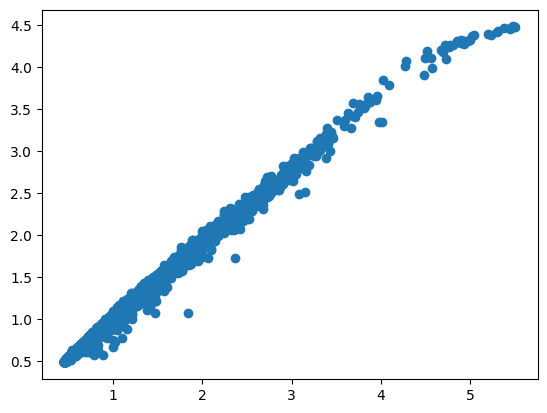

In [50]:
# how did we do!?
plt.scatter(
    testtargetds,
    oni_predictions
    )
#plt.xlim([-3,3])
#plt.ylim([-3,3])
plt.show()